## .聚合聚类/层次聚类

聚合聚类涉及合并示例，直到达到所需的群集数量为止。它是层次聚类方法的更广泛类的一部分，通过 AgglomerationClustering 类实现的，主要配置是“ n _ clusters ”集，这是对数据中的群集数量的估计，例如2。下面列出了完整的示例。

#### 参数设置说明
```python
class sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean',
memory=Memory(cachedir=None), connectivity=None, n_components=None,
compute_full_tree='auto', linkage='ward', pooling_func=<function mean>)
```
1. * `n_clusters`：一个整数，指定簇的数量。
   * `connectivity`：一个数组或者可调用对象或者为 `None`，用于指定连接矩阵。它给出了每个样本的可连接样本。
   * `affinity`：一个字符串或者可调用对象，用于计算距离。可以为：`'euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed''minkowski', 'manhattan', 'euclidean', 'rogerstanimoto', 'canberra', 'l2', 'dice', 'wminkowski', 'l1', 'cosine', 'sqeuclidean', 'jaccard', 'nan_euclidean', 'cityblock', 'russellrao', 'sokalmichener', 'chebyshev', 'seuclidean', 'kulsinski', 'yule', 'haversine', 'precomputed', 'hamming', 'mahalanobis', 'braycurtis', 'matching', 'sokalsneath', 'correlation'`
     如果 `linkage='ward'`，则** **`'affinity`必须是** **`'euclidean'`
   * `memory`：用于缓存输出的结果，默认为不缓存。如果给定一个字符串，则表示缓存目录的路径。
   * `n_components`：将在 `scikit-learn v 0.18`中移除
   * `compute_full_tree`：通常当已经训练了 `n_clusters`之后，训练过程就停止。
     但是如果 `compute_full_tree=True`，则会继续训练从而生成一颗完整的树。
   * `linkage`：一个字符串，用于指定链接算法。
     * `'ward'`：采用方差恶化距离 `variance incress distance` 。
     * `'complete'`：全链接 `complete-linkage`算法，采用** **![四、AgglomerativeClustering - 图1](http://cdn.mianshigee.com/upload/tutorial/huaxiaozhuan-ai/1dab025c565b8b0e6519f6cf4ba15537.svg) 。
     * `'average'`：均链接 `average-linkage`算法,采用** **![四、AgglomerativeClustering - 图2](http://cdn.mianshigee.com/upload/tutorial/huaxiaozhuan-ai/ca1d9cf1a98ee2e0757ae4303a32b525.svg) 。
     * `'single'`：单链接 `single-linkage`算法，采用** **![四、AgglomerativeClustering - 图3](http://cdn.mianshigee.com/upload/tutorial/huaxiaozhuan-ai/1234942c0baa9dad942537b752a539a1.svg) 。
   * `pooling_func`：即将被废弃的接口。
2. 属性：
   * `labels_`：一个形状为 `[n_samples,]` 的数组，给出了每个样本的簇标记。
   * `n_leaves_`：一个整数，给出了分层树的叶结点数量。
   * `n_components_`：一个整数，给除了连接图中的连通分量的估计值。
   * `children_`：一个形状为 `[n_samples-1,2]`数组，给出了每个非叶结点中的子节点数量。
3. 方法：
   * `fit(X[, y])`：训练模型。
   * `fit_predict(X[, y])`：训练模型并执行聚类，返回每个样本所属的簇标记。

/Users/magu/anaconda3/envs/TS_ENV_38_add_AKshare/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


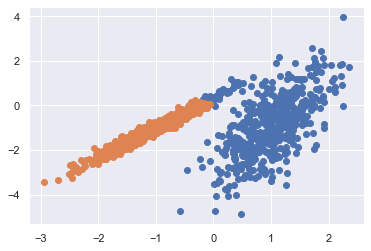

In [1]:
# 亲和力传播聚类
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
import seaborn as sns
sns.set()


# 聚合聚类
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering


# 定义数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 定义模型
model = AgglomerativeClustering(n_clusters=2,affinity='cosine',linkage='single')
# 模型拟合与聚类预测
yhat = model.fit_predict(X)
# 检索唯一群集
clusters = unique(yhat)
# 为每个群集的样本创建散点图
for cluster in clusters:
# 获取此群集的示例的行索引
    row_ix = where(yhat == cluster)
# 创建这些样本的散布
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# 绘制散点图
pyplot.show()